In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3

In [68]:
pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.8 kB 825.8 kB/s eta 0:00:01
   ------------------------------------ --- 266.2/294.8 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33038 sha256=d85c6f4a22740b226280820c7558dd48f95fa63a4b70913cc28ae0420e5657a7
  Stored in directory: c:\users\pawel\appdata\local\pip\cache\wheels\f6\80\48\193eff32ed8e176623b15874055438ecec522ba68ed05abee6
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('data.csv')
df = df[df['threshold_GC'] != 0]
df = df[df['threshold_DT'] != 0]

In [6]:
GC_threshold = df[['threshold_GC', 'IOULG']]
DT_threshold = df[['threshold_DT', 'IOULD']]
DT_GC_threshold = df[['threshold_DT', 'threshold_GC', 'IOUDG']]

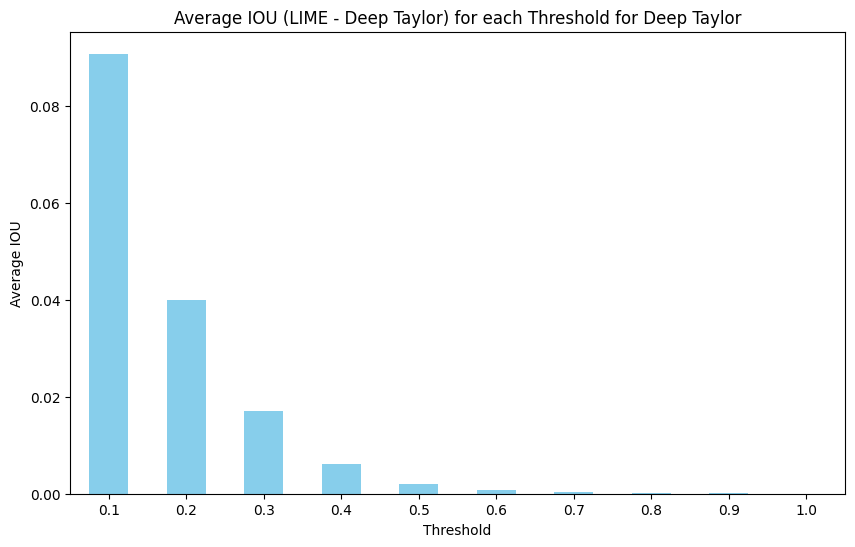

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
DT_threshold.groupby('threshold_DT')['IOULD'].mean().plot(kind='bar', color='skyblue')

plt.title('Average IOU (LIME - Deep Taylor) for each Threshold for Deep Taylor')
plt.xlabel('Threshold')
plt.ylabel('Average IOU')
plt.xticks(rotation=0)

plt.show()

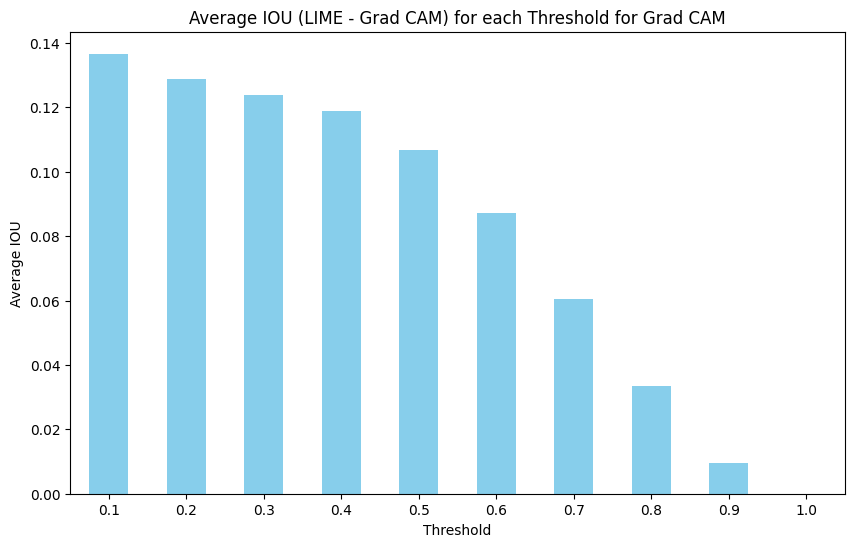

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
GC_threshold.groupby('threshold_GC')['IOULG'].mean().plot(kind='bar', color='skyblue')

plt.title('Average IOU (LIME - Grad CAM) for each Threshold for Grad CAM')
plt.xlabel('Threshold')
plt.ylabel('Average IOU')
plt.xticks(rotation=0)

plt.show()

In [15]:
DT_GC_threshold_grouped = DT_GC_threshold.groupby(['threshold_GC', 'threshold_DT'])['IOUDG'].mean().reset_index()


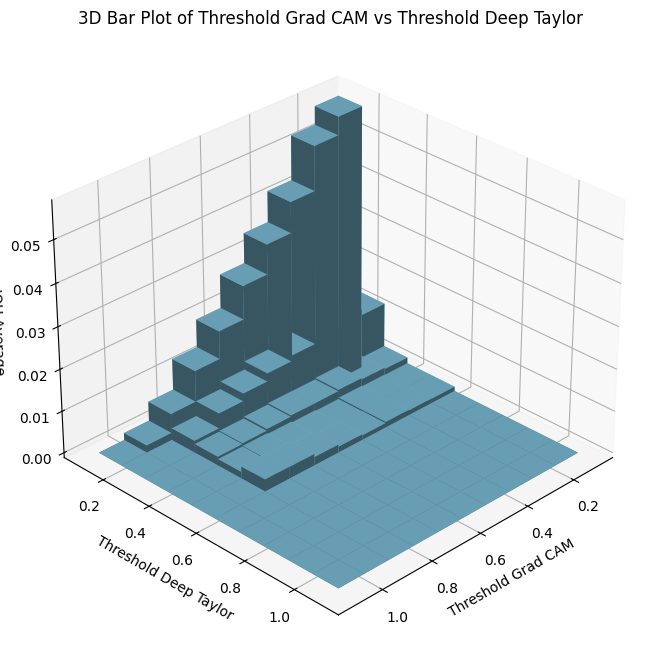

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(DT_GC_threshold_grouped['threshold_GC'], DT_GC_threshold_grouped['threshold_DT'], np.zeros(len(DT_GC_threshold_grouped)), 
         0.1, 0.1, DT_GC_threshold_grouped['IOUDG'], color='skyblue')

ax.set_xlabel('Threshold Grad CAM')
ax.set_ylabel('Threshold Deep Taylor')
ax.set_zlabel('IOU Average')
ax.set_title('3D Bar Plot of Threshold Grad CAM vs Threshold Deep Taylor')

ax.view_init(azim=45, elev=30)
plt.show()

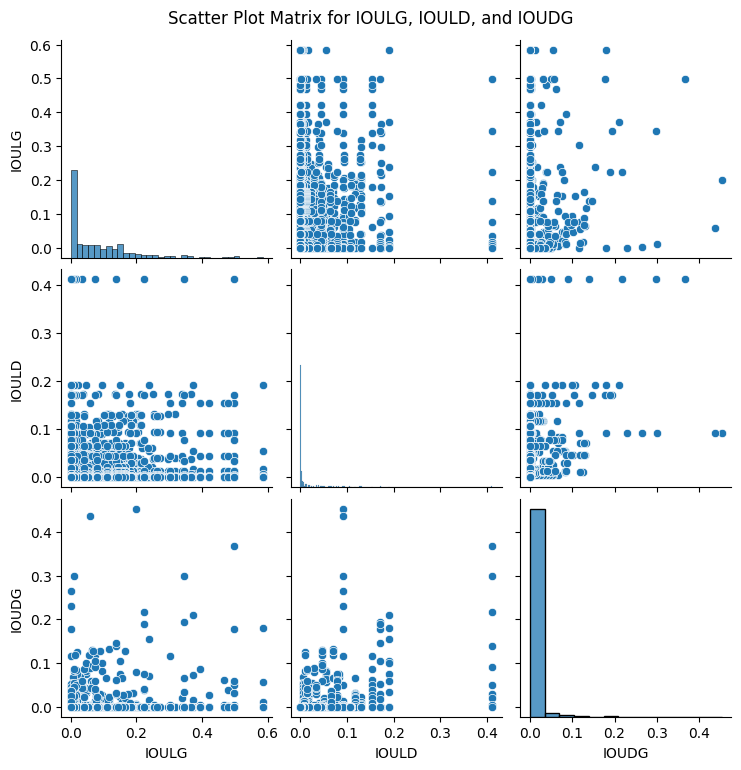

In [18]:
sns.pairplot(df[['IOULG', 'IOULD', 'IOUDG']])
plt.suptitle('Scatter Plot Matrix for IOULG, IOULD, and IOUDG', y=1.02)
plt.show()


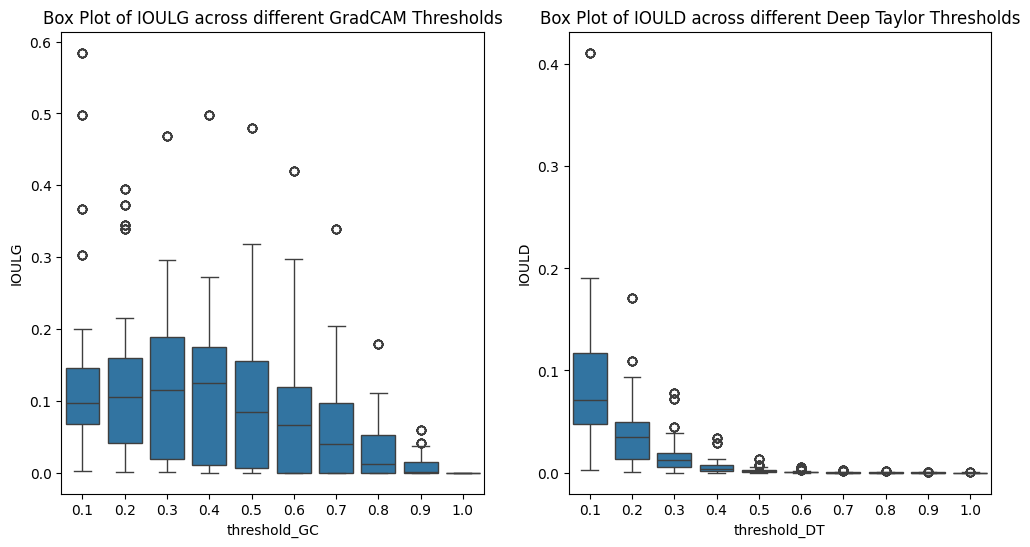

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='threshold_GC', y='IOULG', data=df)
plt.title('Box Plot of IOULG across different GradCAM Thresholds')
plt.subplot(1, 2, 2)
sns.boxplot(x='threshold_DT', y='IOULD', data=df)
plt.title('Box Plot of IOULD across different Deep Taylor Thresholds')
plt.show()

In [11]:
filtered_df = df[(df['threshold_GC'] == 0.4) & (df['threshold_DT'] == 0.1)]

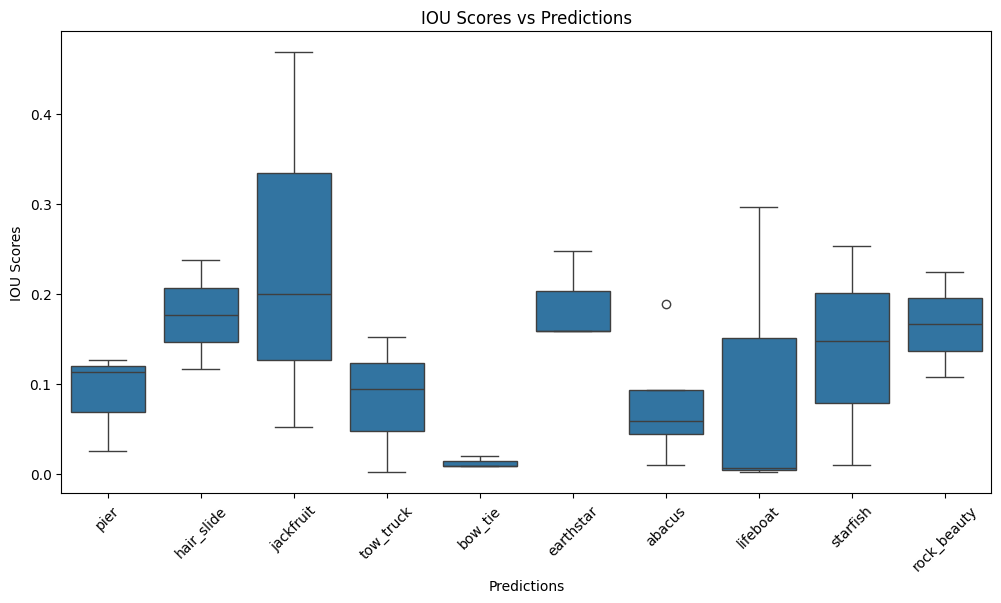

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='prediction', y='IOULG', data=filtered_df)
plt.title('IOU Scores vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('IOU Scores')
plt.xticks(rotation=45)
plt.show()

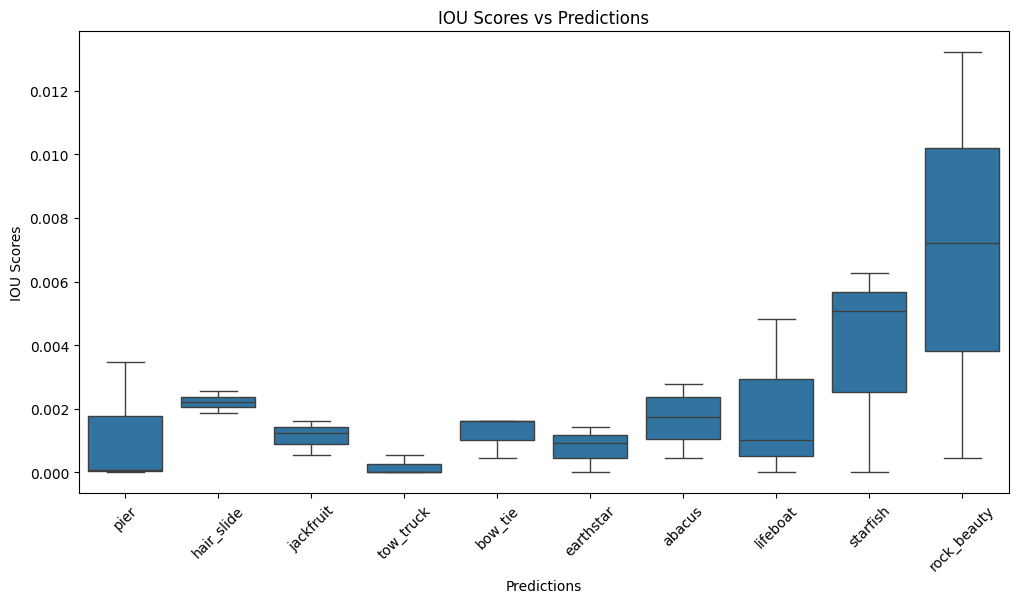

In [13]:
filtered_df = df[(df['threshold_GC'] == 0.5) & (df['threshold_DT'] == 0.5)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='prediction', y='IOULD', data=filtered_df)
plt.title('IOU Scores vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('IOU Scores')
plt.xticks(rotation=45)
plt.show()

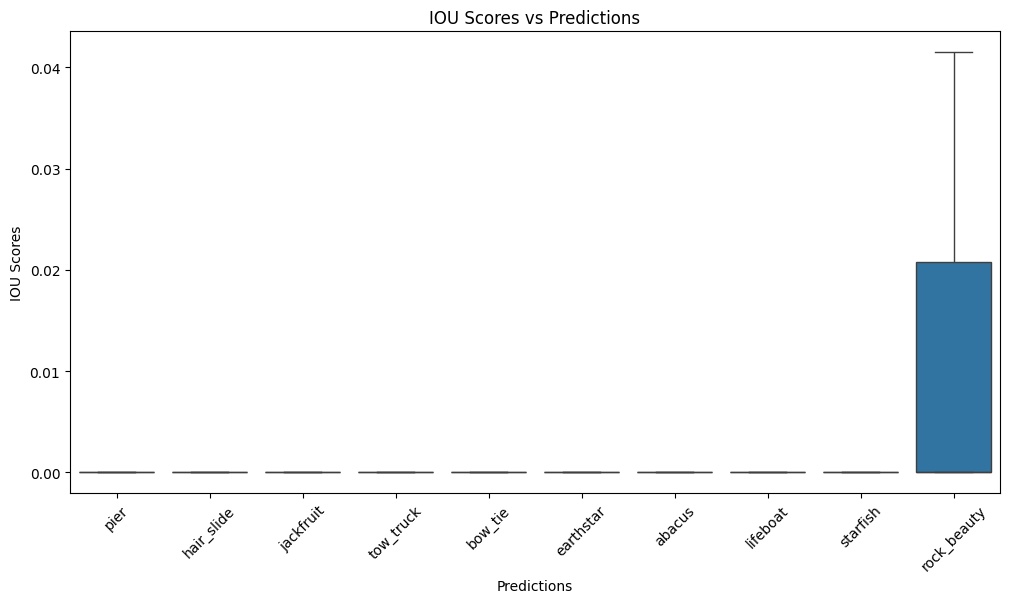

In [14]:
filtered_df = df[(df['threshold_GC'] == 0.5) & (df['threshold_DT'] == 0.5)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='prediction', y='IOUDG', data=filtered_df) 
plt.title('IOU Scores vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('IOU Scores')
plt.xticks(rotation=45) 
plt.show()